In [29]:
%matplotlib notebook
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
batting_df = pd.read_csv("db/batting4.csv")

In [3]:
batting_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 11 columns):
playerID      691 non-null object
R             691 non-null float64
RBI           691 non-null float64
SB            691 non-null float64
AVG           691 non-null float64
SLG           691 non-null float64
Games_C       691 non-null float64
Games_2B      691 non-null float64
Games_3B      691 non-null float64
Games_SS      691 non-null float64
HOF_member    691 non-null int64
dtypes: float64(9), int64(1), object(1)
memory usage: 59.5+ KB


In [4]:
X = batting_df[["R","RBI","SB","AVG","SLG","Games_C","Games_2B","Games_3B","Games_SS"]]
y = batting_df["HOF_member"]

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [6]:
# split data into test and train
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=27)


In [7]:
# Normalize the data.  Here, we are using StandardScaler
X_scaler = StandardScaler().fit(X_train)
#X_scaler = MinMaxScaler().fit(X_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)



In [8]:
model = LogisticRegression(C=1.0, penalty='l2', random_state=0, solver="saga", max_iter=5000)

In [ ]:
X_train_scaled.shape

In [9]:
model.fit(X_train_scaled,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=5000, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='saga',
          tol=0.0001, verbose=0, warm_start=False)

In [10]:
from sklearn.metrics import mean_squared_error

In [11]:
predictions = model.predict(X_test_scaled)
MSE = mean_squared_error(y_test, predictions)
r2 = model.score(X_test_scaled, y_test)

print(f"MSE: {MSE}, R2: {r2}") 


MSE: 0.06936416184971098, R2: 0.930635838150289


If curious about which players in the test split were predicted for what, we can take these two outputs, import and pair them

In [23]:
X_test["predictions"] = predictions
X_test.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,predictions
502,598.0,517.0,43.0,0.266578,0.375774,0.0,1134.0,50.0,19.0,0
471,611.0,696.0,23.0,0.261822,0.408527,0.0,0.0,0.0,0.0,0
463,934.0,629.0,126.0,0.303387,0.409610,0.0,914.0,219.0,234.0,1
688,715.0,797.0,47.0,0.267718,0.431503,105.0,0.0,1249.0,0.0,0
103,813.0,993.0,188.0,0.263167,0.471232,0.0,1.0,1.0,0.0,0


In [13]:
X_test.to_csv("db/Xtest.csv", index=False, header=True)

Here's what we've been waiting for:  Let's make Hall-Of-Fame predictions for more recent and current players.

In [14]:
recent_df = pd.read_csv("db/batting_recent.csv")

In [15]:
recent_players = recent_df["playerID"]
X_recent = recent_df[["R","RBI","SB","AVG","SLG","Games_C","Games_2B","Games_3B","Games_SS"]]

In [16]:
X_recent_scaled = X_scaler.transform(X_recent)

In [17]:
predictions_recent = model.predict(X_recent_scaled)

In [18]:
X_recent["predictions"] = predictions_recent
X_recent["playerID"] = recent_players

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [19]:
people_df = pd.read_csv("db/people.csv")

In [20]:
players_df = people_df[["playerID","nameFirst","nameLast"]]
players_df["nameFull"] = players_df["nameFirst"]+' '+players_df["nameLast"]
players_df.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,playerID,nameFirst,nameLast,nameFull
0,aardsda01,David,Aardsma,David Aardsma
1,aaronha01,Hank,Aaron,Hank Aaron
2,aaronto01,Tommie,Aaron,Tommie Aaron
3,aasedo01,Don,Aase,Don Aase
4,abadan01,Andy,Abad,Andy Abad


In [21]:
X_recent.to_csv("db/Xrecent.csv", index=False, header=True)

In [22]:
Predicted_for_HOF = X_recent.loc[X_recent["predictions"] == 1, :]
Predicted_for_HOF = pd.merge(Predicted_for_HOF, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
display(Predicted_for_HOF)

,R,RBI,SB,AVG,SLG,Games_C,Games_2B,Games_3B,Games_SS,predictions,playerID,nameFull
0,950.0,882.0,271.0,0.302627,0.507613,0.0,0.0,0.0,0.0,1,abreubo01,Bobby Abreu
1,1023.0,980.0,272.0,0.280692,0.496555,0.0,0.0,0.0,0.0,1,beltrca01,Carlos Beltran
2,959.0,1026.0,74.0,0.300445,0.558522,0.0,0.0,0.0,0.0,1,berkmla01,Lance Berkman
3,879.0,937.0,181.0,0.304248,0.543913,0.0,0.0,112.0,0.0,1,braunry02,Ryan Braun
4,961.0,1123.0,33.0,0.318206,0.561010,0.0,0.0,541.0,0.0,1,cabremi01,Miguel Cabrera
5,876.0,904.0,48.0,0.309560,0.499410,0.0,1500.0,0.0,1.0,1,canoro01,Robinson Cano
6,912.0,492.0,285.0,0.283658,0.406996,0.0,36.0,0.0,1313.0,1,furcara01,Rafael Furcal
7,950.0,1051.0,166.0,0.325297,0.584110,0.0,0.0,0.0,0.0,1,guerrvl01,Vladimir Guerrero
8,1091.0,1076.0,36.0,0.332496,0.585099,0.0,0.0,0.0,0.0,1,heltoto01,Todd Helton
9,949.0,966.0,101.0,0.311412,0.531493,0.0,0.0,0.0,0.0,1,hollima01,Matt Holliday


In [60]:
Predicted_for_HOF = pd.merge(X_recent, players_df, on="playerID", how="left")
del Predicted_for_HOF["nameFirst"]
del Predicted_for_HOF["nameLast"]
del Predicted_for_HOF["playerID"]
Predicted_for_HOF.to_csv("batting picks.csv", index=False, header=True)

Plot some charts for both test and recent data

In [24]:
X_graph = pd.concat([X_test, X_recent])
X_graph.head()

C:\Users\Laptop 1\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


,AVG,Games_2B,Games_3B,Games_C,Games_SS,R,RBI,SB,SLG,playerID,predictions
502,0.266578,1134.0,50.0,0.0,19.0,598.0,517.0,43.0,0.375774,NaN,0
471,0.261822,0.0,0.0,0.0,0.0,611.0,696.0,23.0,0.408527,NaN,0
463,0.303387,914.0,219.0,0.0,234.0,934.0,629.0,126.0,0.409610,NaN,1
688,0.267718,0.0,1249.0,105.0,0.0,715.0,797.0,47.0,0.431503,NaN,0
103,0.263167,1.0,1.0,0.0,0.0,813.0,993.0,188.0,0.471232,NaN,0


In [27]:
X_graph_grouped = X_graph.groupby(["predictions"],as_index=False).mean()

In [37]:
X_graph_grouped

,predictions,AVG,Games_2B,Games_3B,Games_C,Games_SS,R,RBI,SB,SLG
0,0,276.307516,139.417241,171.482759,81.020690,95.534483,675.382759,639.313793,94.068966,441.342095
1,1,309.527464,169.000000,102.282609,74.608696,338.630435,953.086957,895.043478,162.000000,508.832748


In [35]:

X_graph_grouped["AVG"] = X_graph_grouped["AVG"] * 1000
X_graph_grouped["SLG"] = X_graph_grouped["SLG"] * 1000

In [54]:
means_no

R      675.382759
RBI    639.313793
SB      94.068966
SLG    441.342095
AVG    276.307516
Name: 0, dtype: float64

<IPython.core.display.Javascript object>


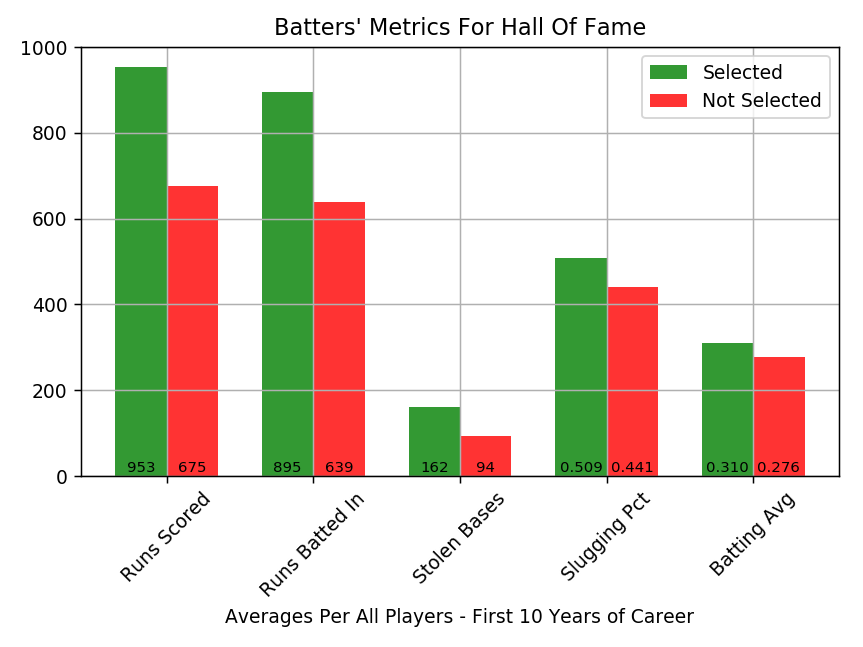

In [56]:
# Need to rescale the averages so they don't get swamped by the counting stats
n_groups = 5
means_no  = X_graph_grouped.iloc[0, [6,7,8,9,1]]
means_yes = X_graph_grouped.iloc[1, [6,7,8,9,1]]

# create plot
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.8

rects1 = plt.bar(index, means_yes, bar_width,
alpha=opacity,
color='g',
label='Selected')

rects2 = plt.bar(index + bar_width, means_no, bar_width,
alpha=opacity,
color='r',
label='Not Selected')

plt.xlabel('Averages Per All Players - First 10 Years of Career')
plt.title("Batters' Metrics For Hall Of Fame")
plt.xticks(index + (bar_width/2), ('Runs Scored', 'Runs Batted In', 'Stolen Bases', 'Slugging Pct', 'Batting Avg' ), rotation=45)
plt.grid()
plt.legend()

# Use functions to label the percentages of changes
def valuelabel(rects, ptext):

    x = 0
    for rect in rects:
        height = rect.get_height()
        if height > 10:
            ypos = 2
        elif height > 0:
            ypos = height + 1   # not enough room in the bar, so display just over it
        elif height > -10:
            ypos = height - 5
        else:
            ypos = -6
            
        plt.text(rect.get_x() + rect.get_width() / 2, ypos, ptext[x], ha="center", va="bottom", fontsize=8)
        x += 1
 
# reverse the above rescaling so that we can show true values
means_yes[3] = means_yes[3] / 1000
means_yes[4] = means_yes[4] / 1000

# Call function to implement value labeling
chgx = pd.Series(["{:.0f}".format(means_yes[0]),
                  "{:.0f}".format(means_yes[1]),
                  "{:.0f}".format(means_yes[2]),
                  "{:.3f}".format(means_yes[3]),
                  "{:.3f}".format(means_yes[4]),
                 ])
valuelabel(rects1, chgx)

means_no[3] = means_no[3] / 1000
means_no[4] = means_no[4] / 1000

chgx = pd.Series(["{:.0f}".format(means_no[0]),
                  "{:.0f}".format(means_no[1]),
                  "{:.0f}".format(means_no[2]),
                  "{:.3f}".format(means_no[3]),
                  "{:.3f}".format(means_no[4]),
                 ])

valuelabel(rects2, chgx)



plt.tight_layout()

In [57]:
# Save the Figure
plt.savefig("batters_metrics.png", bbox_inches="tight")